In [ ]:
import joblib
import pandas as pd

df = pd.read_csv("dataset_entrenamiento_final.csv")
df.head()
target = "conteo_delitos" # columna objetivo
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    objective="reg:squarederror"
)

model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE:", rmse)

# GUARDAR EL MODELO
joblib.dump(model, "modelo_riesgo_delictivo.pkl")




RMSE: 0.05935832247332171


Modelo cargado correctamente.

IMPORTANCIA DE VARIABLES (GAIN)
                  feature   importance
5   conteo_delitos_graves  2355.222168
6  conteo_llamadas_riesgo   217.812592
4              dia_semana    65.065453
2                     mes    59.209095
3                     dia    43.619820
0                lat_grid    37.142624
1                lon_grid    30.778057


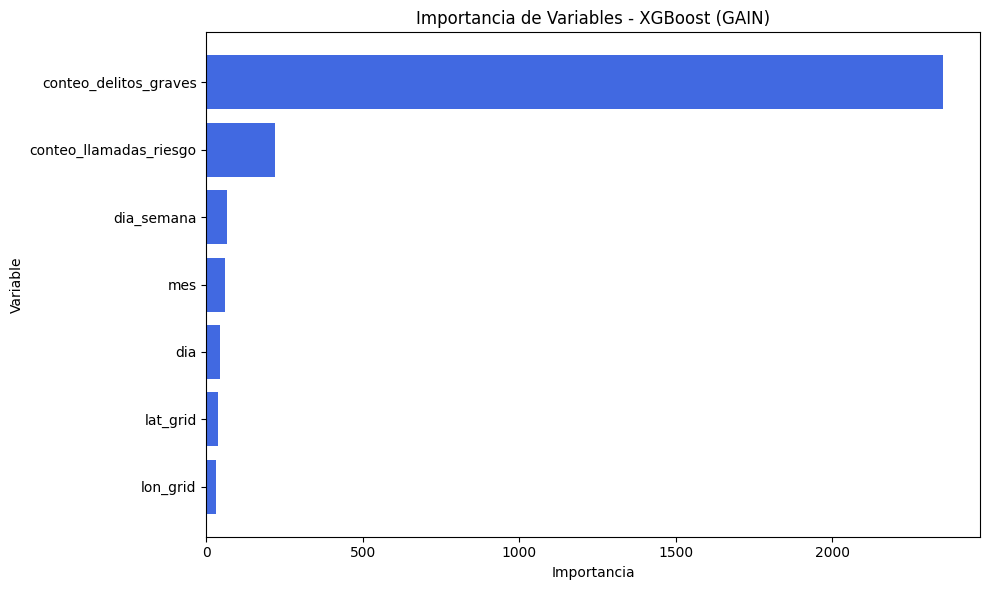

In [4]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1. CARGAR EL MODELO ENTRENADO DESDE ARCHIVO
# ============================================================

modelo = joblib.load("modelo_riesgo_delictivo.pkl")

print("Modelo cargado correctamente.")

# ============================================================
# 2. OBTENER IMPORTANCIA DE VARIABLES (XGBoost GAIN)
# ============================================================

booster = modelo.get_booster()
importance = booster.get_score(importance_type='gain')

df_importance = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
})

df_importance = df_importance.sort_values(by='importance', ascending=False)

print("\n==============================")
print("IMPORTANCIA DE VARIABLES (GAIN)")
print("==============================")
print(df_importance)

# ============================================================
# 3. GRAFICAR IMPORTANCIA DE VARIABLES
# ============================================================

plt.figure(figsize=(10, 6))
plt.barh(df_importance["feature"], df_importance["importance"], color="royalblue")
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - XGBoost (GAIN)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
